In [4]:
import tensorflow as tf

### reading and saving images

In [4]:
img = cv2.imread('./data/lena.jpg', -1)
cv2.imshow('img',img)
k = cv2.waitKey(0) & 0xFF
#if the escape key is hit it will close the window
#if the s key is hit it will save the image
if k == 27:
    cv2.destroyAllWindows()
elif k == ord('s'):
    cv2.imwrite('./data/lena_copy.png', img)
    cv2.destroyAllWindows()

### reading video live stream

In [7]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### reading in webcam and converting it to gray

In [13]:
cap = cv2.VideoCapture(0)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
while cap.isOpened():
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('gray', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

640.0
480.0


### writing a video

In [16]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./data/output.avi', fourcc, 20.0, (640,480))
while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        out.write(frame)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('gray', gray)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

### Drawing Geometric Shapes on Images

In [2]:
img = cv2.imread('./data/lena.jpg', 1)
#cv2.imshow('image', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [3]:
img.shape

(512, 512, 3)

In [4]:
#draw a line
#cv2.line(image, (starting point tuple), (ending poing tuple), (bgr tuple), thickness)
img = cv2.line(img, (0,0), (512,255), (147,96,44), 5)

#draw arrowed line
img = cv2.arrowedLine(img, (30,500), (75,50), (0,255,0), 2)

#draw a rectangle
#cv2.rectangle(img, (pt1 tuple), (pt2 tuple), (bgr color tuple), thickness)
img = cv2.rectangle(img, (80, 10), (150, 300), (255,0,0), 6) 
#(points 80 over 10 down to 100 over 300 down)
#-1 thickness will fill the rectangle with the color
img = cv2.rectangle(img, (80, 10), (150, 300), (0,0,0), -1) 

#draw a circle
#img = cv2.circle(img, (center as tuple), radius, (color bgr tuple), thickness)
img = cv2.circle(img, (255,255), 100, (0,0,128), 2)

#adding text to image
font = cv2.FONT_HERSHEY_SIMPLEX
#img = cv2.putText(img, string text, (start point of text), fontface, 
#fontscale, color, thickness, linetype)
img = cv2.putText(img, 'opencv', (10,500), font, 4, (128,128,128), 3, cv2.LINE_AA)


cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#other things you draw are eclipse, polyline,polygon, etc 

### Create an image using numpy zeros

In [5]:
#really just creating a np array of zeros with the defined shape
#np.zeros([shape as a list], dtype)
img = np.zeros([512, 512, 3], np.uint8)
img = cv2.putText(img, 'opencv', (10,500), font, 4, (128,128,128), 3, cv2.LINE_AA)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Add text to videos and change resolution of video output

In [13]:
cap = cv2.VideoCapture(0)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#able to set the cap properties (there are a lot of properties)
#property number 3 is width and 4 is height
cap.set(3, 1280)
cap.set(4, 720)
print(cap.get(3))
print(cap.get(4))

height = int(cap.get(4))
width = int(cap.get(3))
text = f'Width: {width}, Height: {height}'
font = cv2.FONT_HERSHEY_SIMPLEX

while cap.isOpened():
    ret,frame = cap.read()
    if ret == True:
        frame = cv2.putText(frame, text, (10,50), font, 1, (0,255,255), 1, cv2.LINE_AA)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

640.0
480.0
1280.0
720.0


### Print Date and Time on Video 

In [15]:

import datetime

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret,frame = cap.read()
    if ret == True:
        font = cv2.FONT_HERSHEY_SIMPLEX
        #getting the time
        datet = str(datetime.datetime.now())
        #plugging to the time onto the frame
        frame = cv2.putText(frame, datet, (10,50), font, 1, (0,0,255), 1, cv2.LINE_AA)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

### Mouse Events in opencv

In [16]:
import numpy as np
import cv2

In [17]:
#here is a list of all mouse events available in cv2
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [9]:
#the goal of this code is the print the coordinates on the image when a left mouse click 
#and to print the BGR values onto the image when a right mouse click
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x, y)
        font = cv2.FONT_HERSHEY_SIMPLEX
        strXY = f'{x}, {y}'
        cv2.putText(img, strXY, (x, y), font, .5, (255,0,255), 1)
        cv2.imshow('image', img)
    if event == cv2.EVENT_RBUTTONDOWN:
        font = cv2.FONT_HERSHEY_SIMPLEX
        #not quite sure why img[y,x,band] instead of img[x,y,band]?
        #down comes first, then over second, then the band!
        #row first then column so y first then x
        blue = img[y,x,0]
        green = img[y,x,1]
        red = img[y,x,2]
        print(x,y)
        strBGR = f'{blue}, {green}, {red}'
        print(strBGR)
        cv2.putText(img, strBGR, (x, y), font, .5, (255,255,255), 1)
        cv2.imshow('image', img)

In [10]:
img = np.random.randint(0,255, size = [2,2,3],dtype = 'uint8')
img = cv2.resize(img, (512,512))
cv2.imshow('image',img)
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

9 20
75, 198, 62
9 27
21 57
75, 198, 62
21 57
55 72


### Connecting Two Mouse Clicks with a Line

In [13]:
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 5, (128,128,255), -1)
        points.append((x,y))
        print(x,y)
        if len(points) >= 2:
            cv2.line(img, points[-2], points[-1], (50,255,255), 5)
        cv2.imshow('image', img)

        

img = np.random.randint(0,255, size = [512,512,3],dtype = 'uint8')
cv2.imshow('image',img)
points = []
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

418 358
181 431
137 348
231 339
288 442
418 358
268 236
231 340
316 77


### Showing the color of the point clicked on a second window

In [25]:
import numpy as np
import cv2

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        blue = img[y,x,0]
        green = img[y,x,1]
        red = img[y,x,2]
        
        cv2.circle(img, (x,y), 3, (100,100,100), -1)
        mycolorImage = np.zeros((512,512,3), np.uint8)
        
        mycolorImage[:] = [blue, green, red]
        cv2.imshow('colorwindow', mycolorImage)

        

img = np.random.randint(0,255, size = [2,2,3],dtype = 'uint8')
img = cv2.resize(img, (512,512))
cv2.imshow('image',img)
points = []
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Basic Operations in Images

In [1]:
import cv2
img = cv2.imread('./data/messi5.jpg', 1)

In [2]:
print(img.shape) #tuple of the (rows, columns, and channels)
print(img.size) #total number of pixels
print(img.dtype) #image datatype of the pixels

(342, 548, 3)
562248
uint8


In [3]:
b,g,r = cv2.split(img)
print(b,g,r)

[[39 42 44 ... 57 55 52]
 [37 42 46 ... 62 60 57]
 [41 46 51 ... 64 63 60]
 ...
 [56 48 49 ... 60 63 73]
 [54 59 50 ... 56 69 64]
 [45 58 71 ... 49 52 51]] [[ 43  46  47 ...  55  53  50]
 [ 40  45  49 ...  60  58  55]
 [ 45  50  55 ...  63  62  59]
 ...
 [143 133 129 ... 134 134 145]
 [138 141 130 ... 132 142 137]
 [129 140 151 ... 124 125 124]] [[ 44  47  52 ...  55  53  50]
 [ 44  49  54 ...  60  58  55]
 [ 50  55  60 ...  65  64  61]
 ...
 [ 99  89  86 ...  92  94 103]
 [ 96  99  87 ...  91 104  97]
 [ 87  98 108 ...  86  87  86]]


In [4]:
img = cv2.merge((b,g,r))
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#copy the ball from the image and place it else on the image
ball = img[280:340,330:390] #extracts the ball
img[273:333, 100:160] = ball #sets the img coordinates to the pixel values of the ball variable

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#merge two images together
img = cv2.imread('./data/messi5.jpg',1)
img = cv2.resize(img, (512,512))
img2 = cv2.imread('./data/opencv-logo.png',1)
img2 = cv2.resize(img2, (512,512))
#both images need to have the same size so we use cv2.resize() method
dst = cv2.add(img, img2)

cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
#add weighted images
img
img2
dst = cv2.addWeighted(img, .75, img2, .25, 0)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Bitwise Operators

In [35]:
#bitwise operators work well when working with masks

In [1]:
import cv2
import numpy as np

In [2]:
img1 = np.zeros((250,500,3), np.uint8) #create a black image
img1 = cv2.rectangle(img1, (200,0), (300,100), (255,255,255), -1) #adds a white rectangle to the black image
img2 = cv2.imread('./data/image_1.png', 1)

In [46]:
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
#The Logic AND
#B A Q
#0 0 0
#0 1 0
#1 0 0
#1 1 1
#areas that are white in both images and be white in the new image
bitAnd = cv2.bitwise_and(img2, img1)
cv2.imshow('bitAnd', bitAnd)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
#The Logic OR
#B A Q
#0 0 0
#0 1 1
#1 0 1
#1 1 1
#Any area that is white will give white in the new image
bitOr = cv2.bitwise_or(img2, img1)
cv2.imshow('bitor', bitOr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
#The Logic XOR
#B A Q
#0 0 0
#0 1 1
#1 0 1
#1 1 0
#A OR B but NOT BOTH gives Q
bitXOr = cv2.bitwise_xor(img2, img1)
cv2.imshow('bitxor', bitXOr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
#The Logic NOT
#returns the oposite of the input
bitNot1 = cv2.bitwise_not(img1)
bitNot2 = cv2.bitwise_not(img2)
cv2.imshow('bitnot1', bitNot1)
cv2.imshow('bitnot2', bitNot2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Trackbars

In [4]:
#usefull when you want to change a value in your image dynamically at runtime

In [2]:
import cv2
import numpy as np

In [7]:
def nothing(x):
    print(x)

img = np.zeros((300,512, 3), np.uint8)
cv2.namedWindow('image')

#creates the trackbars that allow us to change the values of B,G,R
cv2.createTrackbar('B', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('R', 'image', 0, 255, nothing)

switch = '0 : OFF\n 1: ON'
cv2.createTrackbar(switch, 'image', 0,1, nothing)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    
    #get the values of BGR from the trackbar
    b = cv2.getTrackbarPos('B','image')
    g = cv2.getTrackbarPos('G', 'image')
    r = cv2.getTrackbarPos('R', 'image')
    s = cv2.getTrackbarPos(switch, 'image')
    
    #if the switch is set to 0 it changes the image to all black
    if s == 0:
        img[:] = 0
    else:
        #set the values of BGR to the image. now the sliders will change the color on the image
        img[:] = [b,g,r]
    
cv2.destroyAllWindows()

1
2
3
4
5
8
10
15
19
28
34
42
60
68
78
92
101
109
116
120
123
131
134
136
137
139
141
143
151
154
159
160
1


In [1]:
import cv2
import numpy as np

In [2]:
#Another example of trackbars
def nothing(x):
    print(x)

cv2.namedWindow('image')
cv2.createTrackbar('CP', 'image', 100, 400, nothing)
switch = 'Color/Gray'
cv2.createTrackbar(switch, 'image', 0,1, nothing)

while(1):
    img = cv2.imread('./data/lena.jpg', 1)
    pos = cv2.getTrackbarPos('CP', 'image')
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, str(pos), (50,150), font, 4, (0,0,255))
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
    s = cv2.getTrackbarPos(switch, 'image')
    if s == 0:
        pass
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img = cv2.imshow('image', img)
cv2.destroyAllWindows()

101
103
105
115
119
126
141
146
154
160
169
180
183
187
193
195
196
201
202
203
204
206
207
210
211
213
216
219
221
222
223
225
228
229
231
233
235
239
240
241
242
245
246
247
248
250
251
254
255
256
257
259
260
261
1


### Object Detection Using HSV Color Space in images

In [5]:
#lets say we only want to detect a certain color of skittle from an image

In [2]:
import cv2
import numpy as np

In [3]:
def nothing(x):
    pass

In [4]:
#create a new window that will have the trackbar to adjust lower and upper hsv values
cv2.namedWindow('Tracking')
cv2.createTrackbar('LH', 'Tracking', 0, 255, nothing)
cv2.createTrackbar('LS', 'Tracking', 0, 255, nothing)
cv2.createTrackbar('LV', 'Tracking', 0, 255, nothing)
cv2.createTrackbar('UH', 'Tracking', 255, 255, nothing)
cv2.createTrackbar('US', 'Tracking', 255, 255, nothing)
cv2.createTrackbar('UV', 'Tracking', 255, 255, nothing)


while True:
    frame = cv2.imread('./data/smarties.png',1)
    #convert image from bgr to hsv
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos('LH', 'Tracking')
    l_s = cv2.getTrackbarPos('LS', 'Tracking')
    l_v = cv2.getTrackbarPos('LV', 'Tracking')
    u_h = cv2.getTrackbarPos('UH', 'Tracking')
    u_s = cv2.getTrackbarPos('US', 'Tracking')
    u_v = cv2.getTrackbarPos('UV', 'Tracking')
    
    #define threshold for blue color
    lower_bound = np.array([l_h, l_s, l_v])
    upper_bound = np.array([u_h, u_s, u_v])
    #blue balls should set lower_bound = np.array([104, 47, 51]) and upper_bound = np.array([132,255,255])
    #green balls should set lower_bound = np.array([62, 47,51]) and upper_bound = np.array([95,255,255])
    #red balls should set lower_bound = np.array([0,26,113]) and upper_bound = np.array([58,255,255])
    
    
    
    #create a mask between lower and upper bounds
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    
    #use bitwise_and to extract only the colors the vall between those pixel values
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('result', res)
    
    
    key = cv2.waitKey(1)
    if key == 27:
        break

        
cv2.destroyAllWindows()

### Object Tracking using HSV Color Space in Videos

In [ ]:
import cv2
import numpy as np

In [ ]:
def nothing(x):
    pass

In [5]:

cap = cv2.VideoCapture(0)


#create a new window that will have the trackbar to adjust lower and upper hsv values
cv2.namedWindow('Tracking')
cv2.createTrackbar('LH', 'Tracking', 0, 255, nothing)
cv2.createTrackbar('LS', 'Tracking', 0, 255, nothing)
cv2.createTrackbar('LV', 'Tracking', 0, 255, nothing)
cv2.createTrackbar('UH', 'Tracking', 255, 255, nothing)
cv2.createTrackbar('US', 'Tracking', 255, 255, nothing)
cv2.createTrackbar('UV', 'Tracking', 255, 255, nothing)


while True:
    _, frame = cap.read()
    
    
    #convert image from bgr to hsv
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos('LH', 'Tracking')
    l_s = cv2.getTrackbarPos('LS', 'Tracking')
    l_v = cv2.getTrackbarPos('LV', 'Tracking')
    u_h = cv2.getTrackbarPos('UH', 'Tracking')
    u_s = cv2.getTrackbarPos('US', 'Tracking')
    u_v = cv2.getTrackbarPos('UV', 'Tracking')
    
    #define threshold for blue color
    lower_bound = np.array([l_h, l_s, l_v])
    upper_bound = np.array([u_h, u_s, u_v])
    #blue balls should set lower_bound = np.array([104, 47, 51]) and upper_bound = np.array([132,255,255])
    #green balls should set lower_bound = np.array([62, 47,51]) and upper_bound = np.array([95,255,255])
    #red balls should set lower_bound = np.array([0,26,113]) and upper_bound = np.array([58,255,255])
    
    
    
    #create a mask between lower and upper bounds
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    
    #use bitwise_and to extract only the colors the vall between those pixel values
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('result', res)
    
    
    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()        
cv2.destroyAllWindows()

### Thresholding on Images

In [12]:
#thresholding a popular segmenting technique to separate an object from its background
#involves comparing each pixel of an image with a predefined threshold value
#divides all the pixels of the input image into 2 groups
#first group is the pixels with intensity value lower than the threshold
#second group is the pixels with intensity value higher than the threshold

In [13]:
import cv2
import numpy as np

In [14]:
img = cv2.imread('./data/gradient.png', 0)

In [32]:
#binary threshold - values in original image with intensity > 127 get a value of 255 
#while pixels with intensity value < 127 get a new value of 0
_, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
#THRESH_BINARY_INV gives the inverse of the above. Sets high intensity values in original img to 0 
#and low intensity values in img to 255
_, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
#Pixels below the threshold value will not be changed. Values above the threshold value will be
#set to that threshold value (75 in this case).
_, thresh3 = cv2.threshold(img, 75, 255, cv2.THRESH_TRUNC)
#sets any pixel below the threshold value to 0 while keeping the pixels above the threshold
#value at their original pixel values
_, thresh4 = cv2.threshold(img, 75, 255, cv2.THRESH_TOZERO)
#inverse of above. sets everything above the threshold to 0 while keeping the original 
#pixel values for everything below the threshold value
_,thresh5 = cv2.threshold(img, 75, 255, cv2.THRESH_TOZERO_INV)

cv2.imshow('image', img)
cv2.imshow('Thresh1', thresh1)
cv2.imshow('Thresh2', thresh2)
cv2.imshow('Thresh3', thresh3)
cv2.imshow('Thresh4', thresh4)
cv2.imshow('Thresh5', thresh5)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Adaptive Thresholding

In [34]:
#method where the threshold is calculated for a smaller region.
#there will be different threshold values for different regions of an image

#useful with different lighting conditions in different regions 

In [33]:
import cv2
import numpy as np

In [35]:
img = cv2.imread('./data/sudoku.png', 0)

In [50]:
#standard thresholding that produces bad results
_, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

#ADAPTIVE_THRESH_MEAN_C = mean of of the blocksize x blocksize neighborhoold of (x,y) minus c
#produces much better results
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

#ADAPTIVE_THRESH_GAUSSIAN_C = threshold value T(x, y) is a weighted sum of the blocksize x blocksize
#neighborhood of (x,y) minus c
#not much different from the one above. still way better than the first one
thresh3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [51]:
cv2.imshow('img', img)
cv2.imshow('Thresh1', thresh1)
cv2.imshow('Thresh2', thresh2)
cv2.imshow('Thresh3', thresh3)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Matplotlib and OpenCV

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

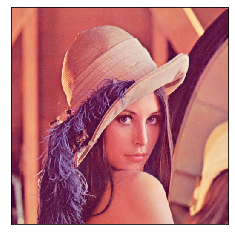

In [3]:
img = cv2.imread('./data/lena.jpg', -1)
cv2.imshow('image', img)

#plt returns an image in notebook using RGB color instead of BGR so the color of lena looks very blue
#so we need to convert it to RGB using cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#plt.xticks([]), plt.yticks([])
plt.show()


cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
#lets show the 6 threshold plots from above on a single matplotlib plot

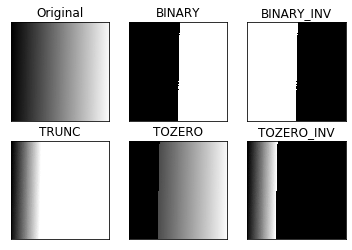

In [6]:
img = cv2.imread('./data/gradient.png', 0)

_, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, 75, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, 75, 255, cv2.THRESH_TOZERO)
_,thresh5 = cv2.threshold(img, 75, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'BINARY', "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV"]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2, 3, i+1) #plt.subplots(number of rows, number of columns, index)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])


plt.show()

### Morphological Transformations in OpenCV

In [9]:
#erosion, dilation, opening, and closing.
#simple operations based on the image shape.
#normally performed on binary images.
#2 things are required: the original image and a kernel
#a kernel tells you how to change the value of any given pixel by combining it with different amounts of neightboring pixels

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

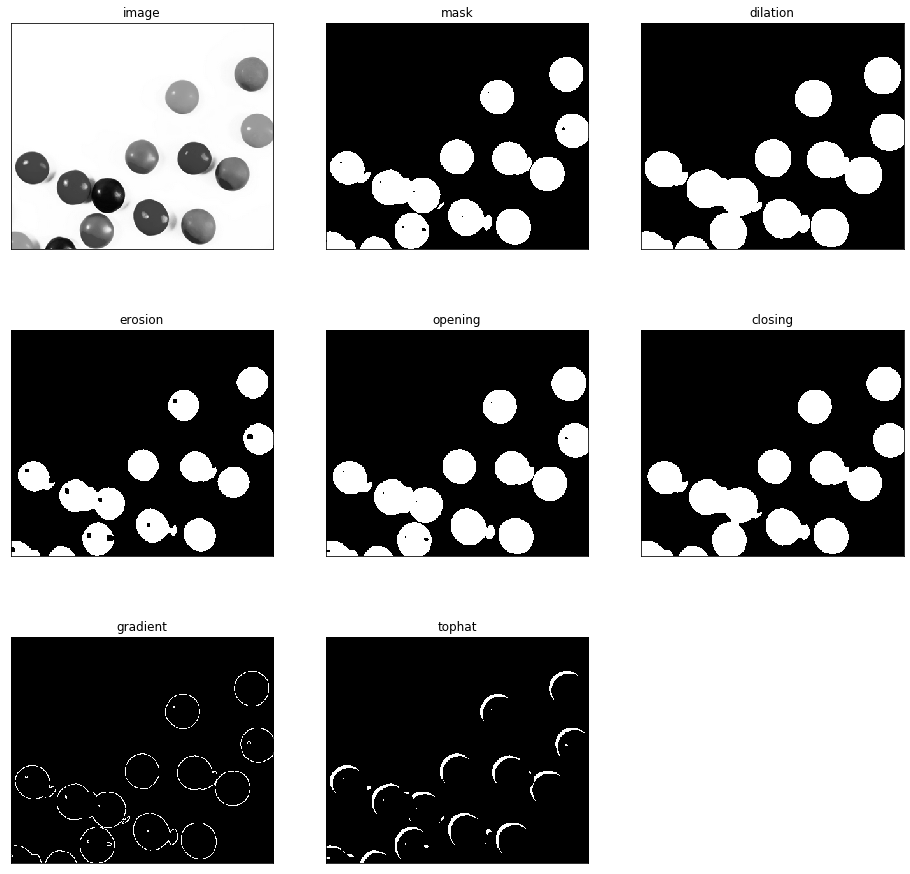

In [43]:
img = cv2.imread('./data/smarties.png', cv2.IMREAD_GRAYSCALE)
#since morphologic transformations are done on binary images we are going to create 
#a mask with simple binary threshold
_, mask = cv2.threshold(img, 220,255, cv2.THRESH_BINARY_INV)
#after the masking there a few black specks on the skittles that we want to remove.
#we will use dilation transformation
kernel = np.ones((2,2), np.uint8)
dilation = cv2.dilate(mask, kernel, iterations = 4)
#some of the black specks are removed but there still some that didn't get removed.
#this gets fixed if we increase the number of iterations or increase the size of rectangle.

kernel = np.ones((2,2), np.uint8)
erosion = cv2.erode(mask, kernel, iterations = 4)
#the sides of the balls have been eroded and the black specs from the mask
#have actually increased in size.
#it erodes away the boundary of the objects
#if all the pixels under the kernel are 1, the central pixel will remain 1.
#if any of hte pixels under the kernel are 0, the central pixel will change to 0.
#hypothetically we could use dilation to fill in the specks of the balls and then erode the outside
#of the balls to shrink them back to the same size as before the dilation

kernel = np.ones((2,2), np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations = 4)
#a method of performing erosion followed by dilation of the image.

kernel = np.ones((2,2), np.uint8)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations = 4)
#closing performs the dilation first to fill in the gaps and then erosion to shrink the
#boundaries back to the size before dilation.
#this performs the best results as the balls are filled in but have not expanded in size 
#like what was seen in just the dilation.
kernel = np.ones((2,2), np.uint8)
gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel, iterations = 1)
#highlights pixels that have a sharp gradient to the next pixels
#the difference between dilation and erosion of an image?
tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel, iterations = 4)
#highlights pixels that have a gradient on the top part of the gradient but not on the bottom
#difference between an image and the opening of an image?

titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'gradient', 'tophat']
images = [img, mask, dilation, erosion, opening, closing, gradient, tophat]

plt.figure(figsize=(16, 16)) 
for i in range(len(images)):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    

plt.show()

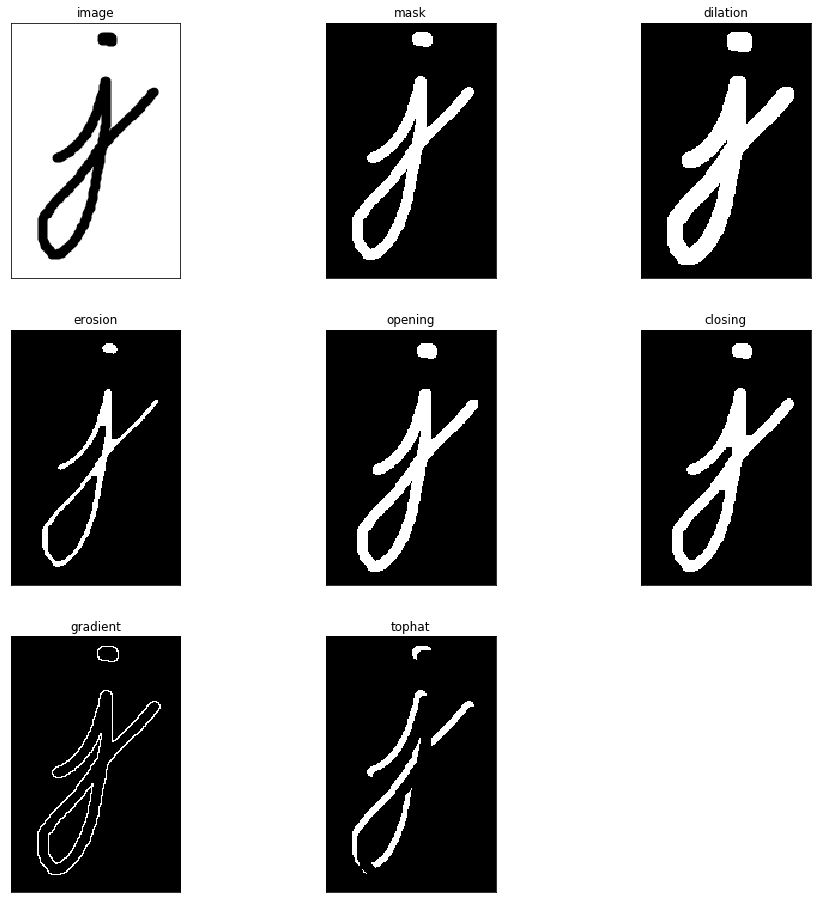

In [45]:
img = cv2.imread('./data/j.png', cv2.IMREAD_GRAYSCALE)
#since morphologic transformations are done on binary images we are going to create 
#a mask with simple binary threshold
_, mask = cv2.threshold(img, 220,255, cv2.THRESH_BINARY_INV)
#after the masking there a few black specks on the skittles that we want to remove.
#we will use dilation transformation
kernel = np.ones((2,2), np.uint8)
dilation = cv2.dilate(mask, kernel, iterations = 4)
#some of the black specks are removed but there still some that didn't get removed.
#this gets fixed if we increase the number of iterations or increase the size of rectangle.

kernel = np.ones((2,2), np.uint8)
erosion = cv2.erode(mask, kernel, iterations = 4)
#the sides of the balls have been eroded and the black specs from the mask
#have actually increased in size.
#it erodes away the boundary of the objects
#if all the pixels under the kernel are 1, the central pixel will remain 1.
#if any of hte pixels under the kernel are 0, the central pixel will change to 0.
#hypothetically we could use dilation to fill in the specks of the balls and then erode the outside
#of the balls to shrink them back to the same size as before the dilation

kernel = np.ones((2,2), np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations = 4)
#a method of performing erosion followed by dilation of the image.

kernel = np.ones((2,2), np.uint8)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations = 4)
#closing performs the dilation first to fill in the gaps and then erosion to shrink the
#boundaries back to the size before dilation.
#this performs the best results as the balls are filled in but have not expanded in size 
#like what was seen in just the dilation.
kernel = np.ones((2,2), np.uint8)
gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel, iterations = 1)
#highlights pixels that have a sharp gradient to the next pixels
#the difference between dilation and erosion of an image?
tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel, iterations = 4)
#highlights pixels that have a gradient on the top part of the gradient but not on the bottom
#difference between an image and the opening of an image?

titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'gradient', 'tophat']
images = [img, mask, dilation, erosion, opening, closing, gradient, tophat]

plt.figure(figsize=(16, 16)) 
for i in range(len(images)):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    

plt.show()

### Smoothing and Blurring Images

In [46]:
#blurring is one of the most commonly used techniques in image processing.
#used to remove noise in an image.
#various kinds of filters including Homogenous filter, Gaussian Filter, Median Filter, Bilateral Filter, etc.


In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

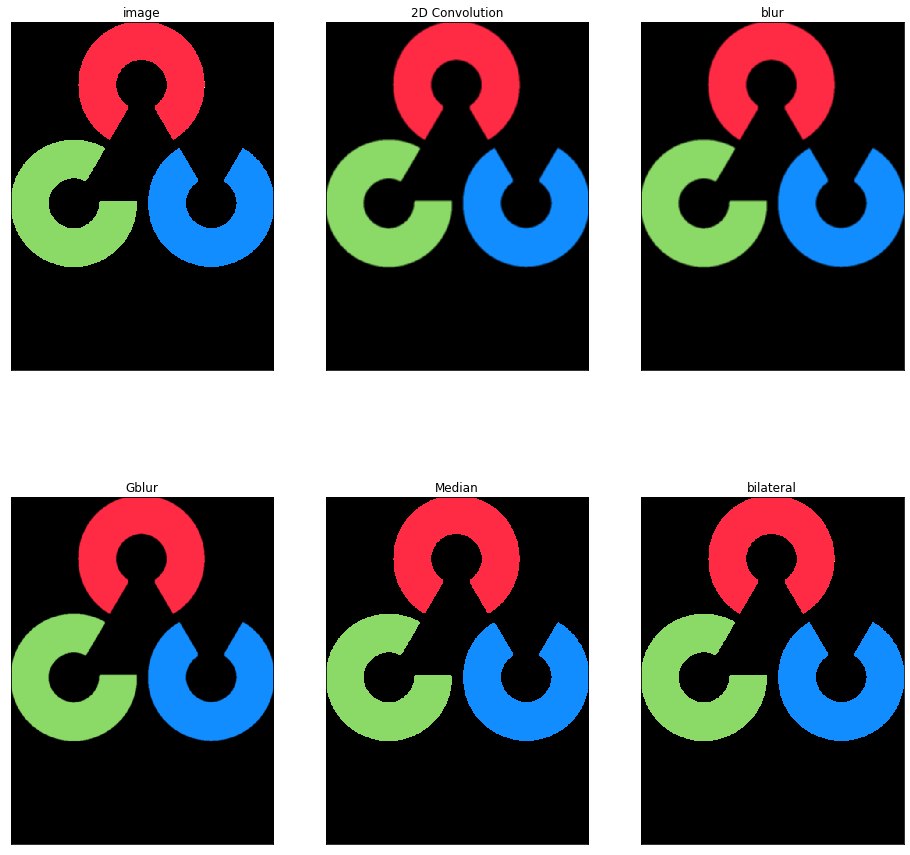

In [82]:
img = cv2.imread('./data/opencv-logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('./data/salt_and_pepper.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#homegeneous filter is the most simple filter.
#each output pixel is the mean of its kernel neighbors
kernel = np.ones((5,5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)

#as in 1d signals, images can also be filtered with various low-pass filters, high-pass filters, etc
#low-pass helps in removing noise (blurring) while high pass helps in finding edges in the image
blur = cv2.blur(img, (5,5))

#Gaussian filter is just using different-weight-kernel, in both x and y direction
#1  4  6  4 1
#4 16 24 16 4
#6 24 36 24 6
#4 16 24 16 4
#1  4  6  4 1
gaus_blur = cv2.GaussianBlur(img, (5,5), 0)

#median filter replaces each pixel's value with the median of its neighboring pixels.
#this method is great when dealing with 'salt and pepper'
med_filter = cv2.medianBlur(img, 5)

#bilateral filter smooths the image but still keeps the edges sharp
bilateral = cv2.bilateralFilter(img, 9, 75, 75)



titles = ['image', '2D Convolution','blur', 'Gblur', 'Median', 'bilateral']
images = [img, dst, blur, gaus_blur, med_filter, bilateral]

plt.figure(figsize=(16, 16)) 
for i in range(len(images)):
    plt.subplot(2,3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

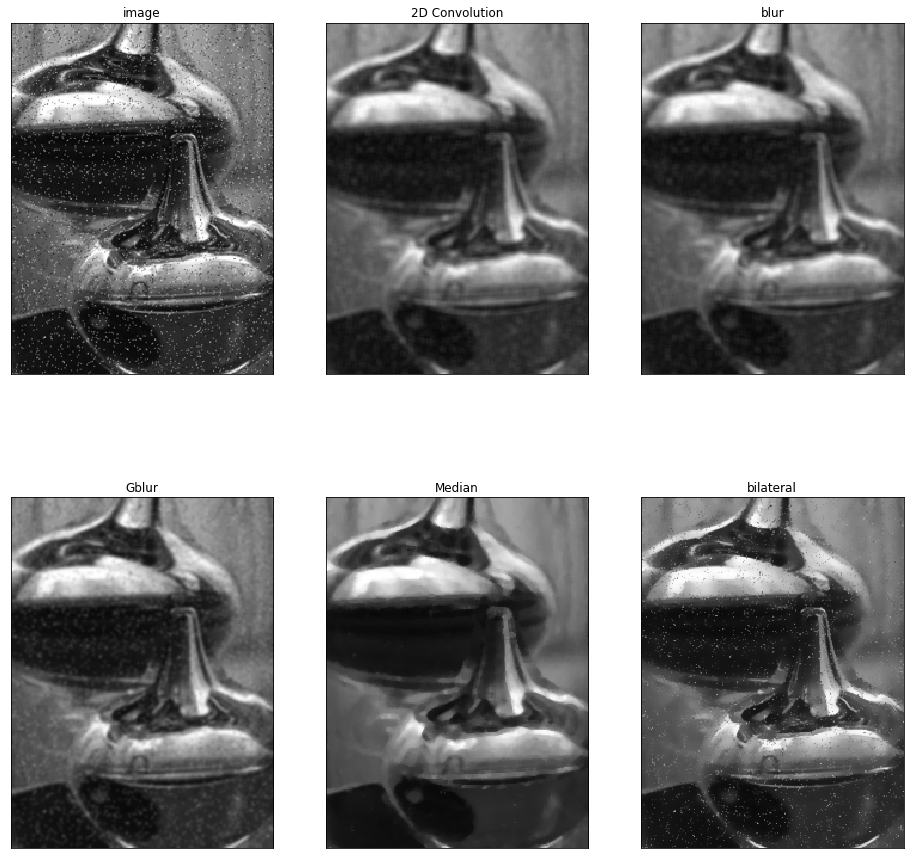

In [83]:
img2 = cv2.imread('./data/salt_and_pepper.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5), np.float32)/25
dst2 = cv2.filter2D(img2, -1, kernel)

#as in 1d signals, images can also be filtered with various low-pass filters, high-pass filters, etc
#low-pass helps in removing noise (blurring) while high pass helps in finding edges in the image
blur2 = cv2.blur(img2, (5,5))

#Gaussian filter is just using different-weight-kernel, in both x and y direction
#1  4  6  4 1
#4 16 24 16 4
#6 24 36 24 6
#4 16 24 16 4
#1  4  6  4 1
gaus_blur2 = cv2.GaussianBlur(img2, (5,5), 0)

#median filter replaces each pixel's value with the median of its neighboring pixels.
#this method is great when dealing with 'salt and pepper'
med_filter2 = cv2.medianBlur(img2, 5)

#bilateral filter smooths the image but still keeps the edges sharp
bilateral2 = cv2.bilateralFilter(img2, 9, 75, 75)



titles = ['image', '2D Convolution','blur', 'Gblur', 'Median', 'bilateral']
images = [img2, dst2, blur2, gaus_blur2, med_filter2, bilateral2]

plt.figure(figsize=(16, 16)) 
for i in range(len(images)):
    plt.subplot(2,3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

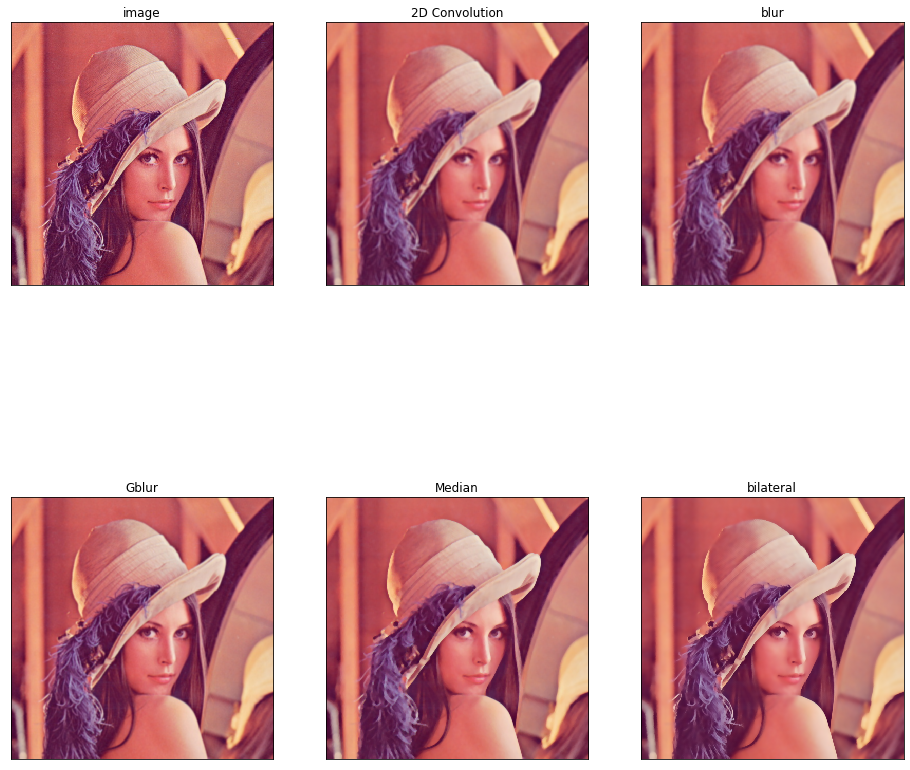

In [87]:
img3 = cv2.imread('./data/lena.jpg', -1)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5), np.float32)/25
dst3 = cv2.filter2D(img3, -1, kernel)

#as in 1d signals, images can also be filtered with various low-pass filters, high-pass filters, etc
#low-pass helps in removing noise (blurring) while high pass helps in finding edges in the image
blur3 = cv2.blur(img3, (5,5))

#Gaussian filter is just using different-weight-kernel, in both x and y direction
#1  4  6  4 1
#4 16 24 16 4
#6 24 36 24 6
#4 16 24 16 4
#1  4  6  4 1
gaus_blur3 = cv2.GaussianBlur(img3, (5,5), 0)

#median filter replaces each pixel's value with the median of its neighboring pixels.
#this method is great when dealing with 'salt and pepper'
med_filter3 = cv2.medianBlur(img3, 5)

#bilateral filter smooths the image but still keeps the edges sharp
bilateral3 = cv2.bilateralFilter(img3, 9, 75, 75)



titles = ['image', '2D Convolution','blur', 'Gblur', 'Median', 'bilateral']
images = [img3, dst3, blur3, gaus_blur3, med_filter3, bilateral3]

plt.figure(figsize=(16, 16)) 
for i in range(len(images)):
    plt.subplot(2,3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

### Image gradients and Edge Detection